# Predicting Heart Disease with K-NN and Logistic Regression

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix,plot_confusion_matrix, plot_roc_curve
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsClassifier

# Data

In [2]:
df = pd.read_csv('Heart_Disease_Prediction.csv')
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [3]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Age,270,NaN,NaN,NaN,54.4333,9.10907,29,48,55,61,77
Sex,270,NaN,NaN,NaN,0.677778,0.468195,0,0,1,1,1
Chest pain type,270,NaN,NaN,NaN,3.17407,0.95009,1,3,3,4,4
BP,270,NaN,NaN,NaN,131.344,17.8616,94,120,130,140,200
Cholesterol,270,NaN,NaN,NaN,249.659,51.6862,126,213,245,280,564
FBS over 120,270,NaN,NaN,NaN,0.148148,0.355906,0,0,0,0,1
EKG results,270,NaN,NaN,NaN,1.02222,0.997891,0,0,2,2,2
Max HR,270,NaN,NaN,NaN,149.678,23.1657,71,133,153.5,166,202
Exercise angina,270,NaN,NaN,NaN,0.32963,0.470952,0,0,0,1,1
ST depression,270,NaN,NaN,NaN,1.05,1.14521,0,0,0.8,1.6,6.2


## To check which data is categorical 

### All categorical data

In [4]:
print("FBS over 120: " + "\n" )
print(df['FBS over 120'].value_counts())
print("\n")
print("Exercise anigna: " + "\n" )
print(df['Exercise angina'].value_counts())
print("\n")
print("EKG: " + "\n" )
print(df['EKG results'].value_counts())
print("\n")
print("Slope of ST: "+ "\n" )
print(df['Slope of ST'].value_counts())

FBS over 120: 

0    230
1     40
Name: FBS over 120, dtype: int64


Exercise anigna: 

0    181
1     89
Name: Exercise angina, dtype: int64


EKG: 

2    137
0    131
1      2
Name: EKG results, dtype: int64


Slope of ST: 

1    130
2    122
3     18
Name: Slope of ST, dtype: int64


In [5]:
df['Cholesterol'].value_counts()   #This is not categorical data

234    6
269    5
254    5
233    4
282    4
      ..
262    1
264    1
276    1
281    1
564    1
Name: Cholesterol, Length: 144, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

### Alot of categorical data is present, firstly we will convert it into object type.

In [7]:
cat_cols = ['Sex','FBS over 120','EKG results','Exercise angina','Slope of ST']

In [8]:
for col in cat_cols:
    print(col, " - ", df[col].nunique())

Sex  -  2
FBS over 120  -  2
EKG results  -  3
Exercise angina  -  2
Slope of ST  -  3


### One-hot encoding is done for the columns where more than 2 values are present, in this case, EKG results and Slope of ST

In [9]:
for col in cat_cols:
    df[col] = df[col].astype('O')
    
df.dtypes

Age                          int64
Sex                         object
Chest pain type              int64
BP                           int64
Cholesterol                  int64
FBS over 120                object
EKG results                 object
Max HR                       int64
Exercise angina             object
ST depression              float64
Slope of ST                 object
Number of vessels fluro      int64
Thallium                     int64
Heart Disease               object
dtype: object

In [10]:
df.shape

(270, 14)

In [11]:
# Checking for missing values.
df.isnull().values.any()

False

In [12]:
# Checking for imbalanced data based on sex.
df['Sex'].value_counts()

1    183
0     87
Name: Sex, dtype: int64

In [13]:
# Checking for imbalanced data based on outcome.
df['Heart Disease'].value_counts()

Absence     150
Presence    120
Name: Heart Disease, dtype: int64

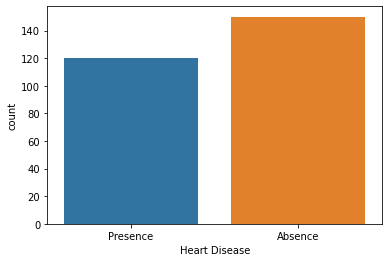

In [16]:
sns.countplot(x='Heart Disease', data=df)

### Creating a list of features which have numeric values to see the correlation

In [17]:
num_cols = list(set(df.columns) - set(cat_cols))
num_cols.remove('Heart Disease')
num_cols

['Chest pain type',
 'Cholesterol',
 'Thallium',
 'Max HR',
 'Number of vessels fluro',
 'BP',
 'ST depression',
 'Age']

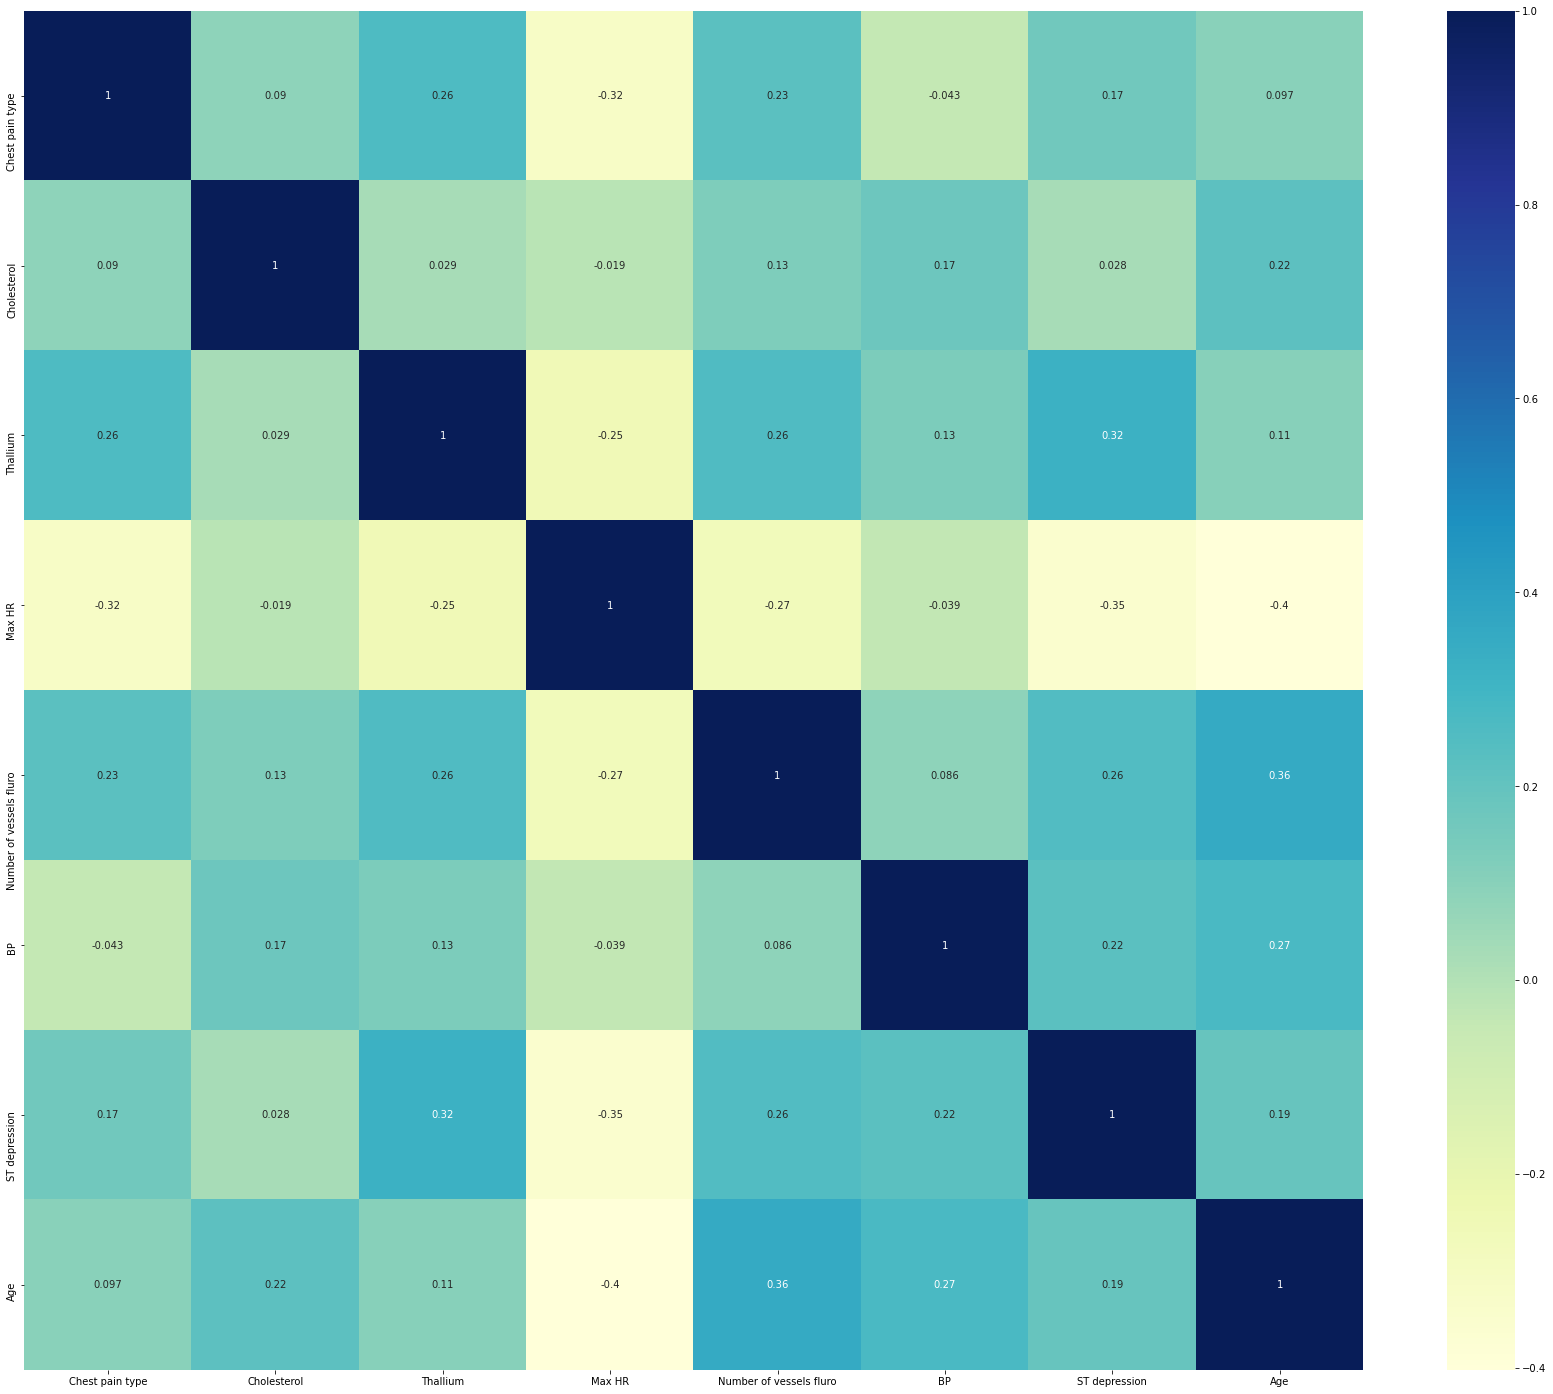

In [18]:
# Checking for any correlations.
plt.figure(figsize = (30, 25))
sns.heatmap(df[num_cols].corr(),annot=True,cmap="YlGnBu")
plt.show()

# K-Nearest Neighbours 

In [19]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [20]:
cat_cols

['Sex', 'FBS over 120', 'EKG results', 'Exercise angina', 'Slope of ST']

In [21]:
df2 = df.copy()

In [22]:
#one-hot encoding

def dummies(x,df):
    temp = pd.get_dummies(df[x],drop_first = True, prefix = x, prefix_sep = '_')
    df = pd.concat([df, temp], axis =1)
    df.drop([x],axis = 1,inplace = True)
    return df


In [28]:
#applying the function 
for col in cat_cols:
    df = dummies(col,df)

In [29]:
df.head()

,Age,Chest pain type,BP,Cholesterol,Max HR,ST depression,Number of vessels fluro,Thallium,Heart Disease,Sex_1,FBS over 120_1,EKG results_1,EKG results_2,Exercise angina_1,Slope of ST_2,Slope of ST_3
0,70,4,130,322,109,2.4,3,3,Presence,1,0,0,1,0,1,0
1,67,3,115,564,160,1.6,0,7,Absence,0,0,0,1,0,1,0
2,57,2,124,261,141,0.3,0,7,Presence,1,0,0,0,0,0,0
3,64,4,128,263,105,0.2,1,7,Absence,1,0,0,0,1,1,0
4,74,2,120,269,121,0.2,1,3,Absence,0,0,0,1,1,0,0


In [25]:
from sklearn.preprocessing import OneHotEncoder

In [27]:
ohe_enc = OneHotEncoder(handle_unknown = 'ignore')
ohe_enc.fit(df[cat_cols])

OneHotEncoder(handle_unknown='ignore')

In [32]:
x_cols = list(df.columns)
x_cols.remove('Heart Disease')
y_cols = ['Heart Disease']

In [35]:
# Splitting the dataset into training and testing sets.
X = df[x_cols]
y = df[y_cols]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = 0.20)

In [36]:
X_train.head()

,Age,Chest pain type,BP,Cholesterol,Max HR,ST depression,Number of vessels fluro,Thallium,Sex_1,FBS over 120_1,EKG results_1,EKG results_2,Exercise angina_1,Slope of ST_2,Slope of ST_3
115,49,2,134,271,162,0.0,0,3,0,0,0,0,0,1,0
33,59,4,170,326,140,3.4,0,7,1,0,0,1,1,0,1
184,53,3,130,246,173,0.0,3,3,1,1,0,1,0,0,0
142,50,3,140,233,163,0.6,1,7,1,0,0,0,0,1,0
197,54,3,110,214,158,1.6,0,3,0,0,0,0,0,1,0


In [38]:
y_train.head()

,Heart Disease
115,Absence
33,Presence
184,Absence
142,Presence
197,Absence


In [39]:
num_cols

['Chest pain type',
 'Cholesterol',
 'Thallium',
 'Max HR',
 'Number of vessels fluro',
 'BP',
 'ST depression',
 'Age']

In [40]:
# Using standard scaler as a standardization technique.
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.transform(X_test)

In [41]:
# Encode y label/ dependent column
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

for i in range(0,2):
    print("Class Label: {0}, --> Heart Disease: {1}".format(i,le.inverse_transform([i])))

Class Label: 0, --> Heart Disease: ['Absence']
Class Label: 1, --> Heart Disease: ['Presence']


In [42]:
# Creating KNN Model.
knn_clf = KNeighborsClassifier(n_neighbors = 3, p = 2, metric = 'euclidean')
knn_clf.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [43]:
y_pred = knn_clf.predict(X_test)
y_pred

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1])

In [44]:
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[31  2]
 [ 6 15]]


In [45]:
print(accuracy_score(y_test,y_pred))

0.8518518518518519


In [46]:
# Define function to perform model result analysis
def getModelPerf(X_train,y_train,X_test,y_test,clf,):
    class_label = ['Absence', 'Presence']
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    
    # Performance Metrics
    accuracy  = round(100*accuracy_score(y_test,y_pred),2)
    precision = round(100*precision_score(y_test,y_pred),2)
    recall    = round(100*recall_score(y_test,y_pred),2) 
    f1        = round(f1_score(y_test,y_pred),2)
    
    cm = confusion_matrix(y_test,y_pred)
    print(" Confusion Matrix: ")
    print("----------------------")
    plot_confusion_matrix(clf,X_test,y_test,display_labels=class_label,cmap='viridis')
    plt.show()
    print("\n Accuracy metrics: ")
    print("----------------------")
    print("Accuracy:  {0}".format(accuracy))
    print("Precision: {0}".format(precision))
    print("Recall:    {0}".format(recall))
    print("F1:        {0}".format(f1))
    print("\n ROC Curve: ")
    print("----------------------")
    plot_roc_curve(clf, X_test, y_test)
    plt.show()
#     return accuracy, precision, recall, f1,clf

In [47]:
knn_clf = KNeighborsClassifier(n_neighbors = 3, p = 2, metric = 'euclidean')

 Confusion Matrix: 
----------------------


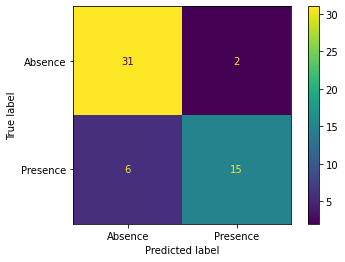


 Accuracy metrics: 
----------------------
Accuracy:  85.19
Precision: 88.24
Recall:    71.43
F1:        0.79

 ROC Curve: 
----------------------


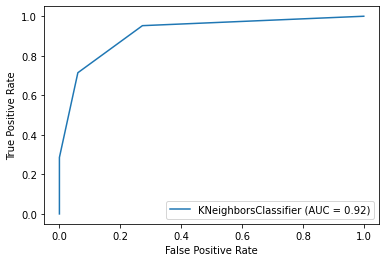

In [48]:
getModelPerf(X_train, y_train, X_test,y_test,knn_clf)

In [49]:
#TODO: Try different values of 'k' and check the accuracy. Select optimal 'k' value based on this.

# Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
log_clf = LogisticRegression(random_state=42)

 Confusion Matrix: 
----------------------


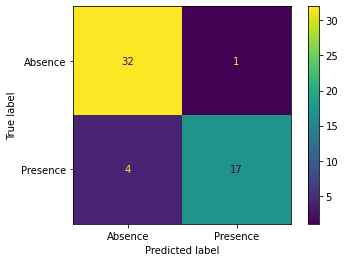


 Accuracy metrics: 
----------------------
Accuracy:  90.74
Precision: 94.44
Recall:    80.95
F1:        0.87

 ROC Curve: 
----------------------


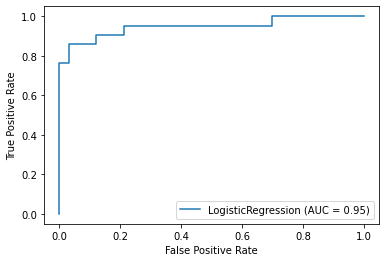

In [52]:
getModelPerf(X_train, y_train, X_test,y_test,log_clf)